<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv("data/yelp_coffeeshop_review_data.csv")
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
import re

# remove extra words from ratings
shops['star_rating'] = shops['star_rating'].apply(lambda rating: re.sub('star rating', '', rating)).astype(float)

In [3]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_shop_name  7616 non-null   object 
 1   full_review_text  7616 non-null   object 
 2   star_rating       7616 non-null   float64
dtypes: float64(1), object(2)
memory usage: 178.6+ KB


In [4]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [5]:
# remove dates from review text
shops['full_review_text'] = shops['full_review_text'].apply(lambda txt: txt[11:])
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0


In [6]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

# load our spacy english language model
nlp = spacy.load('en_core_web_lg')

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### View Overall Word Count

In [7]:
def get_lemmas(text):
    """
    Takes a single document as input.
    Returns a list of lemmas for that document
    """
    STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'austin', 'check', 'shop', 'place', '$'])

    lemmas = []

    doc = nlp(text)

    for token in doc:
        if (token.is_punct == False) & (token.is_stop == False) & (token.pos != 'PRON') & (token.text != " ") & (
            token.text.lower() not in STOP_WORDS
            ):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [8]:
# get lemmas of each review
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
shops.head()

,coffee_shop_name,full_review_text,star_rating,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5.0,"[1, love, love, love, atmosphere, corner, styl..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[list, date, night, ambiance, beautiful, love,..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4.0,"[1, listed, brunch, spot, love, eclectic, home..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2.0,"[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,"[1, locate, northcross, mall, shopping, center..."


In [9]:
def count(lemmas):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each lemma
    word_counts = Counter()
    
    # stores the number of docs that each lemma appears in 
    appears_in = Counter()

    total_docs = len(lemmas)

    for lemma in lemmas:
        # stores count of every appearance of a lemma 
        word_counts.update(lemma)
        # use set() in order to not count duplicates, thereby count the num of docs that each lemma appears in
        appears_in.update(set(lemma))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each lemma
    wc['pct_total'] = wc['count'].apply(lambda lemma_count: lemma_count / total * 100)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs * 100)

    return wc.sort_values(by='rank')

In [10]:
# find counts of the words
wc = count(shops['lemmas'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
147,good,3539,5282,1.0,1.562075,1.562075,46.467962
81,great,2830,3915,2.0,1.157804,2.719879,37.158613
142,like,2273,3380,3.0,0.999586,3.719465,29.845063
400,come,1926,2630,4.0,0.777784,4.497250,25.288866
473,time,1769,2395,5.0,0.708287,5.205536,23.227416
34,love,1816,2377,6.0,0.702963,5.908499,23.844538
35,drink,1642,2348,7.0,0.694387,6.602886,21.559874
30,order,1461,2158,8.0,0.638197,7.241084,19.183298
107,try,1673,2143,9.0,0.633761,7.874845,21.966912
301,food,1418,1920,10.0,0.567812,8.442657,18.618697


In [11]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14958,strata,1,1,14961.0,0.000296,99.998817,0.01313
14960,windowed,1,1,14962.0,0.000296,99.999113,0.01313
14961,actuality,1,1,14963.0,0.000296,99.999409,0.01313
14962,crass,1,1,14964.0,0.000296,99.999704,0.01313
14963,digestion,1,1,14965.0,0.000296,100.000000,0.01313


In [12]:
# overall word count
print("The overall word count is", len(wc), "words.")

The overall word count is 14965 words.


### View Counts by Ratings

In [13]:
# create rating column that had either good or bad in it
shops.loc[shops['star_rating'] <= 3, 'rating'] = 'bad'
shops.loc[shops['star_rating'] >= 4, 'rating'] = 'good'

In [14]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,lemmas,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5.0,"[1, love, love, love, atmosphere, corner, styl...",good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[list, date, night, ambiance, beautiful, love,...",good
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4.0,"[1, listed, brunch, spot, love, eclectic, home...",good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2.0,"[cool, decor, good, drink, nice, seating, over...",bad
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,"[1, locate, northcross, mall, shopping, center...",good


In [15]:
# separate the data based on rating
good_rev = shops[shops['rating'] == 'good']
bad_rev = shops[shops['rating'] == 'bad']

In [16]:
wc_good_rev = count(good_rev['lemmas'])
wc_good_rev.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
174,good,2894,4287,1.0,1.626883,1.626883,47.133550
81,great,2483,3445,2.0,1.307351,2.934234,40.439739
168,like,1678,2436,3.0,0.924443,3.858677,27.328990
34,love,1609,2127,4.0,0.807180,4.665857,26.205212
366,come,1474,1979,5.0,0.751015,5.416872,24.006515
372,time,1344,1778,6.0,0.674737,6.091609,21.889251
35,drink,1278,1735,7.0,0.658419,6.750028,20.814332
107,try,1332,1713,8.0,0.650070,7.400099,21.693811
25,latte,1035,1549,9.0,0.587833,7.987932,16.856678
159,friendly,1443,1520,10.0,0.576828,8.564760,23.501629


In [17]:
wc_bad_rev = count(bad_rev['lemmas'])
wc_bad_rev.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,good,645,995,1.0,1.333244,1.333244,43.699187
12,like,595,944,2.0,1.264907,2.598151,40.311653
122,order,439,773,3.0,1.035776,3.633927,29.742547
83,come,452,651,4.0,0.872303,4.506231,30.623306
208,time,425,617,5.0,0.826745,5.332976,28.794038
34,drink,364,613,6.0,0.821386,6.154362,24.661247
41,food,323,506,7.0,0.678012,6.832373,21.883469
77,great,347,470,8.0,0.629774,7.462147,23.509485
15,service,346,449,9.0,0.601635,8.063781,23.441734
109,go,332,435,10.0,0.582876,8.646657,22.493225


In [18]:
# counts by rating
print("Good reviews have a word count of", len(wc_good_rev), '\n')
print("Bad reviews have a word count of", len(wc_bad_rev))

Good reviews have a word count of 13095 

Bad reviews have a word count of 7068


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


### Relative Frequencies of Word Counts between 'good' and 'bad' Reviews

In [19]:
# get top 10 words from each group
top10_good = wc_good_rev.head(10)
top10_bad = wc_bad_rev.head(10)

In [32]:
top10_good[['word', 'pct_total']]

,word,pct_total
174,good,1.626883
81,great,1.307351
168,like,0.924443
34,love,0.807180
366,come,0.751015
372,time,0.674737
35,drink,0.658419
107,try,0.650070
25,latte,0.587833
159,friendly,0.576828


In [33]:
top10_bad[['word', 'pct_total']]

,word,pct_total
17,good,1.333244
12,like,1.264907
122,order,1.035776
83,come,0.872303
208,time,0.826745
34,drink,0.821386
41,food,0.678012
77,great,0.629774
15,service,0.601635
109,go,0.582876


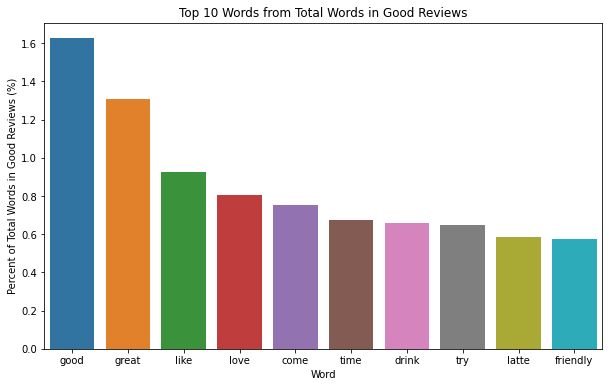

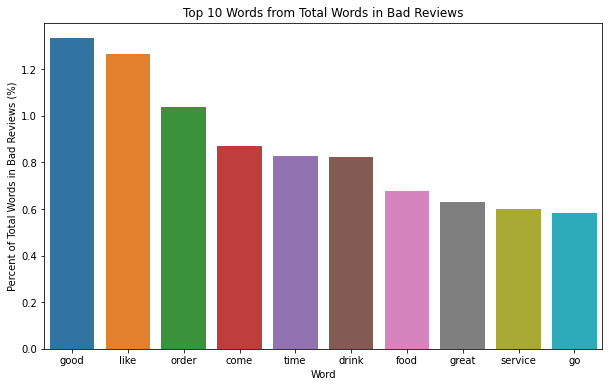

In [20]:
# plot the two 
plt.figure(figsize=(10, 6))
plt.title("Top 10 Words from Total Words in Good Reviews")
sns.barplot(data=top10_good, x='word', y='pct_total').set(xlabel='Word', ylabel="Percent of Total Words in Good Reviews (%)")
plt.show()


plt.figure(figsize=(10, 6))
plt.title("Top 10 Words from Total Words in Bad Reviews")
sns.barplot(data=top10_bad, x='word', y='pct_total').set(xlabel='Word', ylabel="Percent of Total Words in Bad Reviews (%)")
plt.show()

Above are the 10 words that appear most in good and bad reviews, respectively. Good is the most abundant word in both reviews, however the percentage is higher in the good reviews. Through my analysis, it is not known if the word "good" appeared in conjuction with "not" (i.e. "not good") in the bad reviews. "Good", "great", and "like" are the top 3 in the good reviews. Those 3 words also appear in the top 10 of bad reviews, but they are not the top 3. "Good" and "like" are the top two, with "great" being the 8th word. "Love" appears in the good reviews' top 10 words, but not in the bad reviews.

Two words that appear in the good reviews' top 10, but not in the bad reviews' top 10 words, are "latte" and "friendly". Based on this, I would think that good coffee shops have friendly staff and really good lattes.

### Top 10 Words with Greatest Difference in Word Counts

In [21]:
# join the two counts dataframes
joined_wc_by_ratings = wc_good_rev.merge(wc_bad_rev, on='word', how='inner', suffixes=['good', 'bad'])
joined_wc_by_ratings

,word,appears_ingood,countgood,rankgood,pct_totalgood,cul_pct_totalgood,appears_in_pctgood,appears_inbad,countbad,rankbad,pct_totalbad,cul_pct_totalbad,appears_in_pctbad
0,good,2894,4287,1.0,1.626883,1.626883,47.133550,645,995,1.0,1.333244,1.333244,43.699187
1,great,2483,3445,2.0,1.307351,2.934234,40.439739,347,470,8.0,0.629774,7.462147,23.509485
2,like,1678,2436,3.0,0.924443,3.858677,27.328990,595,944,2.0,1.264907,2.598151,40.311653
3,love,1609,2127,4.0,0.807180,4.665857,26.205212,207,250,34.0,0.334986,19.016481,14.024390
4,come,1474,1979,5.0,0.751015,5.416872,24.006515,452,651,4.0,0.872303,4.506231,30.623306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,awfully,1,1,13058.0,0.000379,99.985959,0.016287,1,1,5420.0,0.001340,97.791773,0.067751
5194,undercooked,1,1,13063.0,0.000379,99.987856,0.016287,7,9,1244.0,0.012059,82.540533,0.474255
5195,s.o.,1,1,13066.0,0.000379,99.988995,0.016287,1,1,5478.0,0.001340,97.869489,0.067751
5196,sequence,1,1,13071.0,0.000379,99.990892,0.016287,3,3,2495.0,0.004020,91.392202,0.203252


In [22]:
# create a column of the differences in the counts
joined_wc_by_ratings['wc_diff_good'] = (joined_wc_by_ratings['pct_totalgood'] - joined_wc_by_ratings['pct_totalbad']) / joined_wc_by_ratings['pct_totalbad']
joined_wc_by_ratings['wc_diff_bad'] = -(joined_wc_by_ratings['pct_totalgood'] - joined_wc_by_ratings['pct_totalbad']) / joined_wc_by_ratings['pct_totalgood']
joined_wc_by_ratings.head()

,word,appears_ingood,countgood,rankgood,pct_totalgood,cul_pct_totalgood,appears_in_pctgood,appears_inbad,countbad,rankbad,pct_totalbad,cul_pct_totalbad,appears_in_pctbad,wc_diff_good,wc_diff_bad
0,good,2894,4287,1.0,1.626883,1.626883,47.133550,645,995,1.0,1.333244,1.333244,43.699187,0.220244,-0.180492
1,great,2483,3445,2.0,1.307351,2.934234,40.439739,347,470,8.0,0.629774,7.462147,23.509485,1.075906,-0.518283
2,like,1678,2436,3.0,0.924443,3.858677,27.328990,595,944,2.0,1.264907,2.598151,40.311653,-0.269161,0.368291
3,love,1609,2127,4.0,0.807180,4.665857,26.205212,207,250,34.0,0.334986,19.016481,14.024390,1.409594,-0.584992
4,come,1474,1979,5.0,0.751015,5.416872,24.006515,452,651,4.0,0.872303,4.506231,30.623306,-0.139044,0.161499


In [23]:
# get top 10 words with biggest difference
sorted_wc_diff_good = joined_wc_by_ratings.sort_values(by='wc_diff_good', ascending=False)
top10_wc_diff = sorted_wc_diff_good.head(10)
top10_wc_diff = top10_wc_diff[['word', 'wc_diff_good']]
top10_wc_diff

,word,wc_diff_good
662,authentic,19.391484
436,yum,15.284866
924,patient,12.311108
947,lane,11.744678
960,craving,11.461463
1044,legit,10.328602
614,katsu,10.186995
659,knowledgeable,9.195742
1117,divine,9.195742
1108,caffeinated,9.195742


In [24]:
sorted_wc_diff_bad = joined_wc_by_ratings.sort_values(by='wc_diff_bad', ascending=False)
bottom10_wc_diff = sorted_wc_diff_bad.head(10)
bottom10_wc_diff = bottom10_wc_diff[['word', 'wc_diff_bad']]
bottom10_wc_diff

,word,wc_diff_bad
4623,1.50,37.839743
4930,understanding,30.777971
5194,undercooked,30.777971
5024,existent,30.777971
5136,tick,30.777971
4274,inconvenience,29.012528
4181,trash,23.716200
4459,4.75,23.716200
4514,silence,23.716200
4538,unpleasant,23.716200


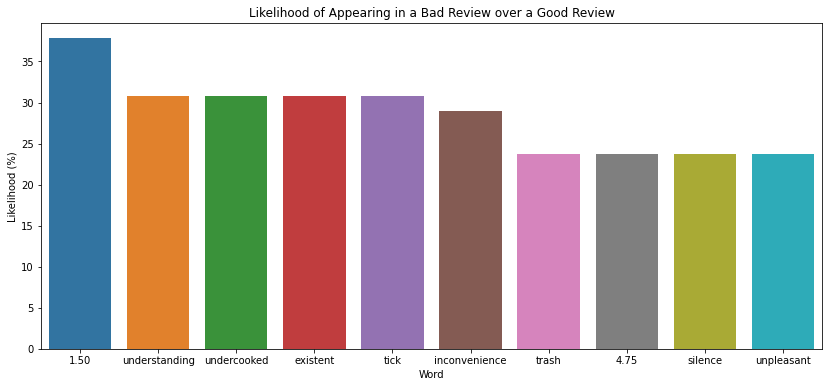

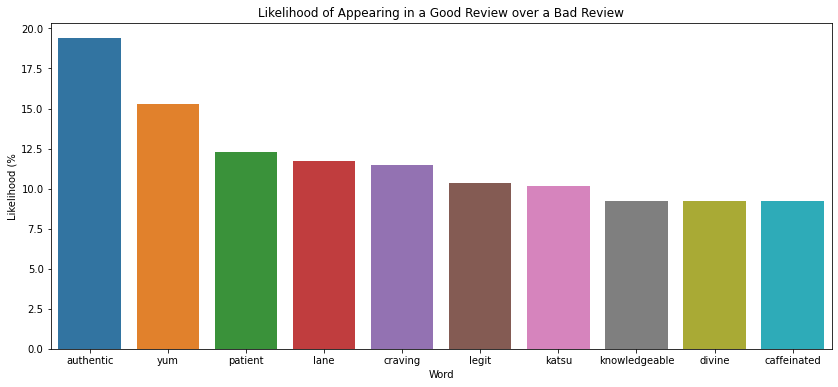

In [28]:
plt.figure(figsize=(14, 6))
plt.title("Likelihood of Appearing in a Bad Review over a Good Review")
sns.barplot(data=bottom10_wc_diff, x='word', y='wc_diff_bad').set(
    xlabel="Word", 
    ylabel="Likelihood (%)"
)
plt.show()

plt.figure(figsize=(14,6))
plt.title("Likelihood of Appearing in a Good Review over a Bad Review")
sns.barplot(data=top10_wc_diff, x='word', y='wc_diff_good').set(
    xlabel='Word',
    ylabel='Likelihood (%'
)
plt.show()

Based on the two plots above, certain attributes make good coffee shops good, and bad coffee shops bad. The first plot shows words that are more likely to appear in reviews that give a bad review. The words most likely to appear in those negative reviews are more negative than the words in the second plot--which show words more likely to appear in good reviews. Price seems to be something focused on in the negative reviews, while it is not as likely to appear in positive ones. Cleanliness and how well food is cooked is a determining factor as well: trash is about 24% more likely, and undercooked is about 31% more likely to appear in a negative review.

Some words more likely to appear in positive/good reviews are authentic (19% more likely), yum (15% more likely), and divine (9%). These descriptive words are quite the contrast to the descriptive words used in the negative reviews: inconvenience (29%) and unpleasant (24%).

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

